In [5]:
import numpy as np
import pandas as pd 
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stats
import cairo
import statistics as st
from network_tolerance_ig import *

In [6]:
df = pd.read_csv('./Renamed Data/Capital-bikeshare-2022.csv',
                 index_col=0)


In [7]:
#Instantiates CreateGraph class from network_tolerance_ig
cg = CreateGraph()
#Perform groupbys in the data and outputs processed df
processed = cg.preprocess(df)
#Create graph from processed df
g = cg.create_network(processed, directed=True)

In [8]:
#Measures to monitor as we delete nodes. Measures MUST BE a list or tuple

measures = ['diameter', 'average_path_length']
measure_params = [{'directed':True}, {'directed':True}]
# =============================================================================
# measures = ['transitivity_avglocal_undirected', 'density']
# #parameters for each measure as a dictionary
# measure_params = [{'mode':'zero'}, {'loops':True}]
# =============================================================================

In [9]:
f=0.05
steps =20


In [10]:
#Instantiates GraphTolerance class from network_tolerance_ig
g1 = g.copy()
tolerance1 = GraphTolerance(g1)
random_fail = tolerance1.random_fail(f=f, steps=steps, 
                         graph_measures=measures,
                         measure_params=measure_params)

random_fail = random_fail.add_suffix('_rf')

In [11]:
g2 = g.copy()
tolerance2 = GraphTolerance(g2)
centrality = 'degree'
centrality_params = {'loops':True}

target_attack_degree = tolerance2.target_attack(f=f, centrality=centrality, 
                                   centrality_params = centrality_params,\
                                    steps=steps, 
                         graph_measures=measures,
                         measure_params=measure_params)

target_attack_degree = target_attack_degree.add_suffix('_ta_d')


In [12]:
g3 = g.copy()
tolerance3 = GraphTolerance(g3)
centrality = 'betweenness'
centrality_params = {'directed':True}

target_attack_bet = tolerance3.target_attack(f=f, centrality=centrality, 
                                   centrality_params = centrality_params,\
                                    steps=steps, 
                         graph_measures=measures,
                         measure_params=measure_params)

target_attack_bet = target_attack_bet.add_suffix('_ta_bet')


# =============================================================================
# #%% Eccentricity Targeted Attack
# g2 = g.copy()
# tolerance2 = GraphTolerance(g2)
# centrality = 'pagerank'
# #centrality_params = {}
# centrality_params = {'mode': 'all'}
# 
# target_attack_pr = tolerance2.target_attack(f=0.05, centrality=centrality, 
#                                    centrality_params = centrality_params,\
#                                     steps= 20, 
#                          graph_measures=measures,
#                          measure_params=measure_params)
# 
# target_attack_pr = target_attack_pr.add_suffix('_ta_pr')
# =============================================================================

In [13]:
results = random_fail.join([target_attack_degree, target_attack_bet])

Text(0.5, 0, 'Fraction of Nodes Removed')

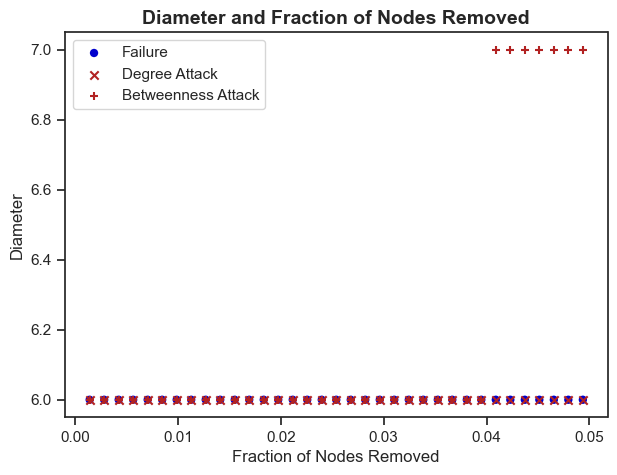

In [14]:
sns.set_theme(style = 'ticks', rc={'figure.dpi': 100})
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=results.f_rf, y=results.iloc[:,2], label='Failure',\
            edgecolors='none', facecolors='mediumblue')
plt.scatter(x=results.f_ta_d, y=results.iloc[:,6], label='Degree Attack', marker = 'x', \
              facecolors='firebrick')
plt.scatter(x=results.f_ta_bet, y=results.iloc[:,10], label='Betweenness Attack', marker = '+', \
              facecolors='firebrick')
ax.legend()
ax.set_title('Diameter and Fraction of Nodes Removed', fontweight='bold', fontsize=14)
ax.set_ylabel('Diameter')
ax.set_xlabel('Fraction of Nodes Removed')


Text(0.5, 0, 'Fraction of Nodes Removed')

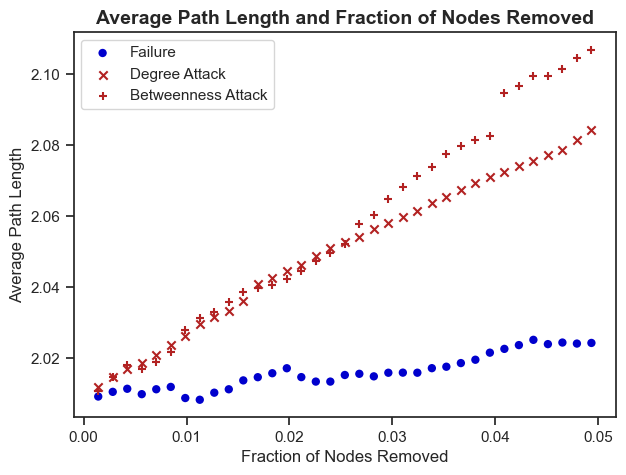

In [15]:
sns.set_theme(style = 'ticks', rc={'figure.dpi': 100})
fig, ax2 =plt.subplots(figsize=(7,5))
plt.scatter(x=results.f_rf, y=results.iloc[:,3], label='Failure',\
            edgecolors='none', facecolors='mediumblue')
plt.scatter(x=results.f_ta_d, y=results.iloc[:,7], label='Degree Attack', marker = 'x', \
              facecolors='firebrick')
plt.scatter(x=results.f_ta_bet, y=results.iloc[:,11], label='Betweenness Attack', marker = '+', \
              facecolors='firebrick')
ax2.legend()
#ax2.set_ybound(1.5, 2.2)
ax2.set_title('Average Path Length and Fraction of Nodes Removed', fontweight='bold', fontsize=14)
ax2.set_ylabel('Average Path Length')
ax2.set_xlabel('Fraction of Nodes Removed')
# =============================================================================

In [17]:
print(g.summary())
print(g1.summary())
print(g2.summary())
print(g3.summary())

IGRAPH DNW- 709 119221 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 674 105907 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 674 94215 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 674 100840 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
